Proyecto Final - EDA Checkin (Yelp)


Importamos librerías

In [1]:
import os
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\JuanPablo\AppData\Local\Temp\ipykernel_5916\2737379261.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Extraemos los datos con pandas en un df hómonimo. lines=True indica que el archivo JSON está en formato JSON Lines, cada línea es un objeto JSON separado.

In [3]:
checkin = pd.read_json("checkin.json", lines=True)

### Realizamos un pre-analisis

Usamos la función "head" para revisar las primeras 2 filas. "shape" para saber cuántas filas y columnas hay en total. "dtypes" para conocer el tipo de dato. Y "describe" para obtener información estadística del dataframe. Y por último chequeamos nulos.

In [4]:
print(checkin.head(2))
print(f"Dimensiones: {checkin.shape}")
print(f"Tipos de datos:\n{checkin.dtypes}")
print(f"estadisticas: \n {checkin.describe()}")


              business_id                                               date
0  ---kPU91CF4Lq2-WlRu9Lw  2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...
1  --0iUa4sNDFiZFrAdIWhZQ  2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...
Dimensiones: (131930, 2)
Tipos de datos:
business_id    object
date           object
dtype: object
estadisticas: 
                    business_id  \
count                   131930   
unique                  131930   
top     ---kPU91CF4Lq2-WlRu9Lw   
freq                         1   

                                                     date  
count                                              131930  
unique                                             131930  
top     2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...  
freq                                                    1  


Revisamos  nulos y duplicados

In [5]:
print(checkin.isnull().sum().sort_values(ascending=False))
print(checkin.duplicated().sum())

business_id    0
date           0
dtype: int64
0


Vamos a verificar si los datos pertenecen a la categoría restaurantes. Usamos el los datos de Business para filtrar nuestro df de Checkin.

In [6]:
filtro_fastfood = pd.read_json("C:/Users/JuanPablo/Desktop/Kazan/Henry/Proyecto Final/Business/filtro_fastfood.json")
checkin_filtrado = checkin.merge(filtro_fastfood[['business_id']], on='business_id', how='inner')

Separamos las fechas en diferentes filas para poder pasar los datos de "object" a "datetime64".

In [7]:
# Separar las fechas y expandir a múltiples filas
df_checkin_exploded = checkin.assign(date=checkin['date'].str.split(', ')).explode('date')

# Convertir a datetime
df_checkin_exploded['date'] = pd.to_datetime(df_checkin_exploded['date'])

# Resultado: cada fila es un check-in con su timestamp
print(df_checkin_exploded.head())
print(df_checkin_exploded.dtypes)


              business_id                date
0  ---kPU91CF4Lq2-WlRu9Lw 2020-03-13 21:10:56
0  ---kPU91CF4Lq2-WlRu9Lw 2020-06-02 22:18:06
0  ---kPU91CF4Lq2-WlRu9Lw 2020-07-24 22:42:27
0  ---kPU91CF4Lq2-WlRu9Lw 2020-10-24 21:36:13
0  ---kPU91CF4Lq2-WlRu9Lw 2020-12-09 21:23:33
business_id            object
date           datetime64[ns]
dtype: object


Vamos a dejar únicamente los datos de los últimos 10 años

In [8]:
checkin_2016 = df_checkin_exploded[df_checkin_exploded['date'] >= '2016-01-01']

Vamos a revisar la distribución de las fechas

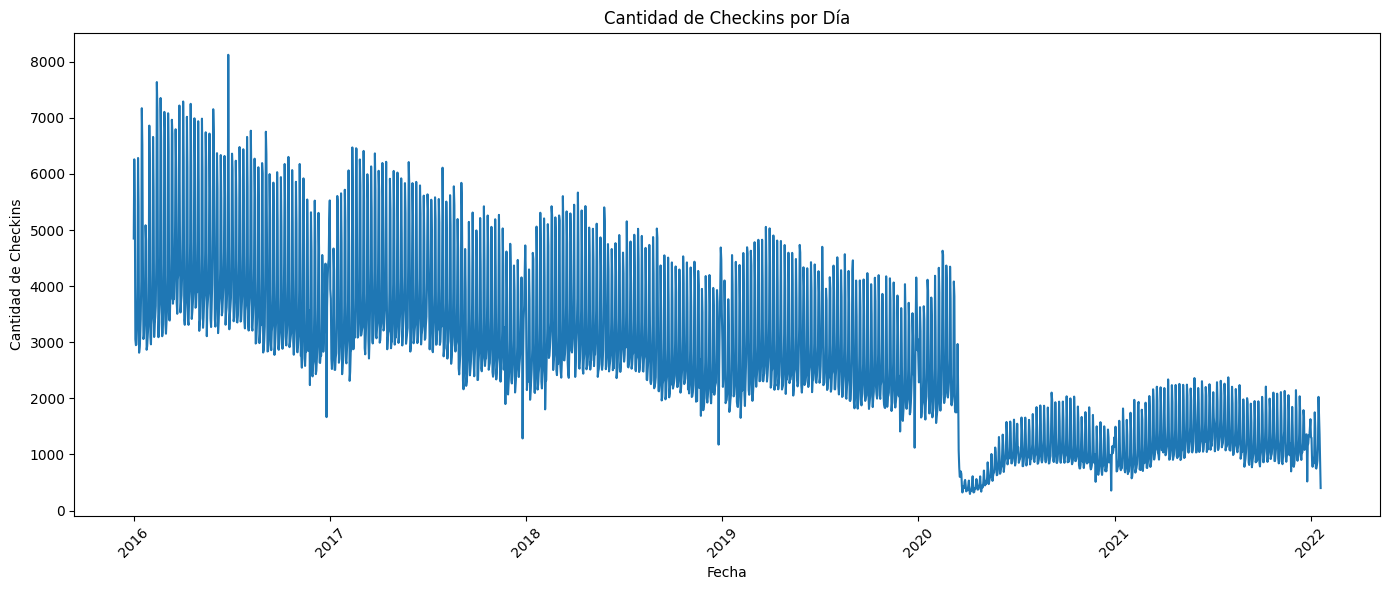

In [9]:
# Contamos checkins por día
checkin_por_fecha = checkin_2016.groupby(checkin_2016['date'].dt.date).size()

# Graficamos
plt.figure(figsize=(14, 6))
checkin_por_fecha.plot()
plt.title('Cantidad de Checkins por Día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Checkins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\JuanPablo\AppData\Local\Temp\ipykernel_5916\927422216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkin_2016['hour'] = checkin_2016['date'].dt.hour


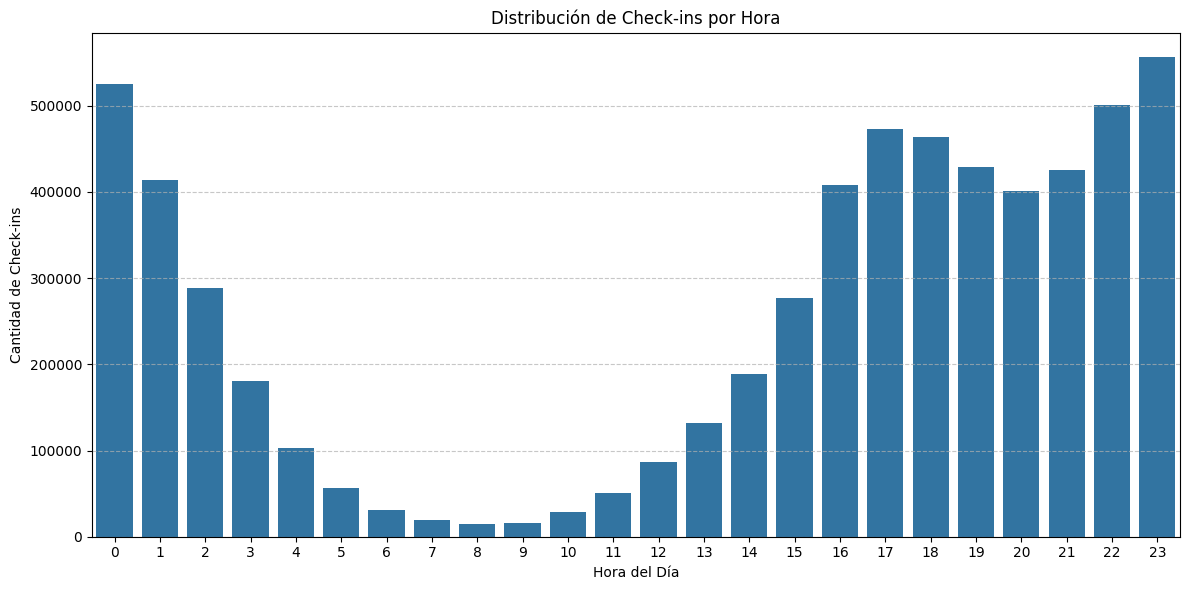

In [10]:
checkin_2016['hour'] = checkin_2016['date'].dt.hour

plt.figure(figsize=(12,6))
sns.countplot(x='hour', data=checkin_2016)
plt.title('Distribución de Check-ins por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Check-ins')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Exportamos

In [12]:
checkin_2016['date'] = checkin_2016['date'].astype(str)

checkin_2016.to_csv("checkin.csv")

C:\Users\JuanPablo\AppData\Local\Temp\ipykernel_5916\1039729783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkin_2016['date'] = checkin_2016['date'].astype(str)


### Conclusión

Hubo un gran uso de la función de checkin de Yelp hasta el año 2020. Los horarios de mayor actividad en Yelp fueron entre las 16hs y las 2hs del siguiente día, el que tiene mayor actividad son las 23hs. 